In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Loading data

In [2]:
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')


# Looking into data

In [3]:

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking how much people survival is dependent on some factors

In [4]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [5]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [6]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [7]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [8]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


# Using Seaborn for visualization

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

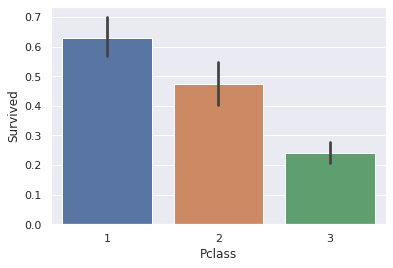

In [9]:
import seaborn as sns
sns.set()
sns.barplot(x='Pclass', y='Survived', data=train_data)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

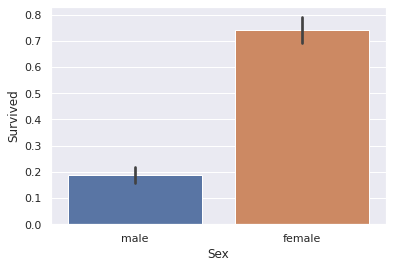

In [10]:
sns.barplot(x='Sex', y='Survived', data=train_data)

# Concatinating train and test data 

In [11]:
train_test_data=pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

**Extracting different Titles in the sex**

In [12]:
train_test_data['Title'] = train_test_data.Name.str.extract('([A-Za-z]+)\.')
pd.crosstab(train_test_data['Title'], train_test_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [13]:
train_test_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dona,NaN
5,Dr,0.428571
6,Jonkheer,0.000000
7,Lady,1.000000
8,Major,0.500000
9,Master,0.575000


**Replacing titles with 'other' if not 'Miss' or 'Mrs' or 'Master**

In [14]:
train_test_data['Title'] = train_test_data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

In [15]:
train_test_data['Title'] = train_test_data['Title'].replace('Mlle', 'Miss')
train_test_data['Title'] = train_test_data['Title'].replace('Ms', 'Miss')
train_test_data['Title'] = train_test_data['Title'].replace('Mme', 'Mrs')

In [16]:
train_test_data['Title'] = train_test_data['Title'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4}).astype(int)

In [17]:
train_test_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,3
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,3
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2


In [18]:
train_test_data['Sex'] = train_test_data['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [19]:
train_test_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,3
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,3
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,2


# Checking for null values

In [20]:
train_test_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
dtype: int64

In [21]:
train_test_data.Embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

**Filling null values with their mean or most used**

In [22]:
train_test_data.Embarked.fillna('S', inplace = True)

In [23]:
train_test_data['Embarked'] = train_test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [24]:
train_test_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,2
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,3
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,1
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,3
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,2


In [25]:
train_test_data.Age.fillna(train_test_data.Age.mean(), inplace = True)
train_test_data.Age.astype(int)

0       22
1       38
2       26
3       35
4       35
        ..
1304    29
1305    39
1306    38
1307    29
1308    29
Name: Age, Length: 1309, dtype: int64

In [26]:
train_test_data.Fare.fillna(train_test_data.Fare.mean(), inplace = True)

train_test_data.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
dtype: int64

# Creating different bands for Age

In [27]:
train_test_data['AgeBand'] = pd.qcut(train_test_data['Age'], 7)
print (train_test_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

          AgeBand  Survived
0   (0.169, 18.0]  0.503597
1    (18.0, 24.0]  0.347826
2    (24.0, 29.0]  0.355140
3  (29.0, 29.881]  0.293785
4  (29.881, 33.0]  0.430380
5    (33.0, 43.0]  0.425197
6    (43.0, 80.0]  0.370968


In [28]:
train_test_data.loc[train_test_data['Age'] <= 18, 'Age_Band'] = 0
train_test_data.loc[(train_test_data['Age'] > 18) & (train_test_data['Age'] <= 22), 'Age_Band'] = 1
train_test_data.loc[(train_test_data['Age'] > 22) & (train_test_data['Age'] <= 25), 'Age_Band'] = 2
train_test_data.loc[(train_test_data['Age'] > 25) & (train_test_data['Age'] <= 43), 'Age_Band'] = 3
train_test_data.loc[train_test_data['Age'] > 43, 'Age_Band'] = 4

In [29]:
train_test_data['Age_Band'] = train_test_data['Age_Band'].astype(int)

In [30]:
train_test_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeBand,Age_Band
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,2,"(18.0, 24.0]",1
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,3,"(33.0, 43.0]",3
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,1,"(24.0, 29.0]",3
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,3,"(33.0, 43.0]",3
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,2,"(33.0, 43.0]",3


# Creating different bands for fare

In [31]:
train_test_data['FareBand'] = pd.qcut(train_test_data['Fare'], 8)
print (train_test_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

           FareBand  Survived
0    (-0.001, 7.75]  0.207143
1     (7.75, 7.896]  0.180723
2   (7.896, 10.008]  0.203540
3  (10.008, 14.454]  0.405405
4   (14.454, 24.15]  0.436364
5   (24.15, 31.275]  0.445378
6   (31.275, 69.55]  0.481818
7  (69.55, 512.329]  0.723810


In [32]:
train_test_data.loc[train_test_data['Fare'] <= 9.844, 'Fare_Band'] = 0
train_test_data.loc[(train_test_data['Fare'] > 9.844) & (train_test_data['Fare'] <= 69.55), 'Fare_Band'] = 1
train_test_data.loc[train_test_data['Fare'] > 69.55, 'Fare_Band'] = 2
train_test_data['Fare_Band'] = train_test_data['Fare_Band'].astype(int)

In [33]:
train_test_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeBand,Age_Band,FareBand,Fare_Band
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,2,"(18.0, 24.0]",1,"(-0.001, 7.75]",0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,3,"(33.0, 43.0]",3,"(69.55, 512.329]",2
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,1,"(24.0, 29.0]",3,"(7.896, 10.008]",0
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,3,"(33.0, 43.0]",3,"(31.275, 69.55]",1
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,2,"(33.0, 43.0]",3,"(7.896, 10.008]",0


# combining familysize

In [34]:
train_test_data['FamilySize'] = train_test_data['SibSp'] +  train_test_data['Parch'] + 1
train_test_data['FamilySize'] = train_test_data['FamilySize'].astype(int)
print (train_test_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


** if family size = 0 => person is alone**

In [35]:
train_test_data.loc[train_test_data['FamilySize'] == 1, 'IsAlone'] = 1
train_test_data.loc[train_test_data['FamilySize'] > 1, 'IsAlone'] = 0
train_test_data['IsAlone'] = train_test_data['IsAlone'].astype(int)

In [36]:
print (train_test_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [37]:
train_test_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeBand,Age_Band,FareBand,Fare_Band,FamilySize,IsAlone
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,2,"(18.0, 24.0]",1,"(-0.001, 7.75]",0,2,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,3,"(33.0, 43.0]",3,"(69.55, 512.329]",2,2,0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,1,"(24.0, 29.0]",3,"(7.896, 10.008]",0,1,1
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,3,"(33.0, 43.0]",3,"(31.275, 69.55]",1,2,0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,2,"(33.0, 43.0]",3,"(7.896, 10.008]",0,1,1


# Dropping the un-necessary columns for good predictions

In [38]:
drop_cols = ['Age', 'Cabin', 'Fare', 'Name', 'Parch', 'SibSp', 'Ticket', 'AgeBand',
             'FareBand', 'FamilySize']

train_test_data.drop(columns=drop_cols, inplace=True)

In [39]:
train_test_data.head()

,Embarked,PassengerId,Pclass,Sex,Survived,Title,Age_Band,Fare_Band,IsAlone
0,0,1,3,0,0.0,2,1,0,0
1,1,2,1,1,1.0,3,3,2,0
2,0,3,3,1,1.0,1,3,0,1
3,0,4,1,1,1.0,3,3,1,0
4,0,5,3,0,0.0,2,3,0,1


# Separating out our training data and test data

In [40]:
train_data = train_test_data[train_test_data['Survived'].notna()]
train_data.head()

,Embarked,PassengerId,Pclass,Sex,Survived,Title,Age_Band,Fare_Band,IsAlone
0,0,1,3,0,0.0,2,1,0,0
1,1,2,1,1,1.0,3,3,2,0
2,0,3,3,1,1.0,1,3,0,1
3,0,4,1,1,1.0,3,3,1,0
4,0,5,3,0,0.0,2,3,0,1


In [41]:
train_data['Survived'] = train_data['Survived'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
train_data.head()

,Embarked,PassengerId,Pclass,Sex,Survived,Title,Age_Band,Fare_Band,IsAlone
0,0,1,3,0,0,2,1,0,0
1,1,2,1,1,1,3,3,2,0
2,0,3,3,1,1,1,3,0,1
3,0,4,1,1,1,3,3,1,0
4,0,5,3,0,0,2,3,0,1


**Separating test data**

In [43]:
test_data = train_test_data.drop(train_test_data[train_test_data.Survived >= 0].index)

In [44]:
test_data.head()

,Embarked,PassengerId,Pclass,Sex,Survived,Title,Age_Band,Fare_Band,IsAlone
891,2,892,3,0,NaN,2,3,0,1
892,0,893,3,1,NaN,3,4,0,0
893,2,894,2,0,NaN,2,4,0,1
894,0,895,3,0,NaN,2,3,0,1
895,0,896,3,1,NaN,3,1,1,0


# Using random forest Classifier MODEL

** Categorical columns to dummies**

In [45]:
y = train_data["Survived"]
features = ["Embarked", "Pclass", "Sex", "Title", "Age_Band", "Fare_Band", "IsAlone"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

In [46]:
acc_random_forest = round(model.score(X, train_data['Survived']) * 100, 2)
print (acc_random_forest)

83.61


# Submission

In [47]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
